<a href="https://colab.research.google.com/github/muhamadrefo/ImageClassificationColab/blob/master/Batik_Scratch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Prepare Environment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#set random seed number for reproducible results
seedNum = 1

In [3]:
# Load libraries and packages
import random
random.seed(seedNum)
import numpy as np
np.random.seed(seedNum)
import tensorflow as tf
tf.random.set_seed(seedNum)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import math
import os
import sys
import shutil
import matplotlib.pyplot as plt
from matplotlib.image import imread
from datetime import datetime

In [4]:
# plot diagnostic learning curves (Grafik)
def grafik(history):
	fig, axs = plt.subplots(2, 1, figsize=(12,12))
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='red', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='red', label='test')
	plt.show()

In [5]:
#set the timer for processing
startTime = datetime.now()

In [6]:
#set default optimizer for the learning rate
default_opt = Adam(learning_rate=0.001)

#2. Data Preparation

In [ ]:
#get the train data
import urllib.request
import zipfile
import smtplib
from email.message import EmailMessage

!wget https://s.id/trainZip
!unzip train.zip > unzip_output.txt

#can be skipped if already have the dataset

#3. Show few image on dataset

In [7]:
#since I alr downloaded the data, im gonna move to the place where the data is
%cd /content/drive/My Drive/TestingPlace/PlaceofDatabase/CNN

/content/drive/My Drive/TestingPlace/PlaceofDatabase/CNN


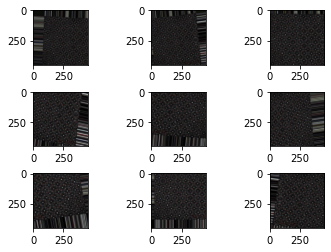

In [8]:
#plot Yogya Cap Nogosari Sogan Black Tophat

#define location of dataset
folder = 'train/'

#plot show first 9 image
for i in range (9):
  #define subplot
  plt.subplot(330 +1 + i) #(3,3, i+1)
  plt.subplots_adjust(hspace=0.5)
  #define filename
  filename = folder + 'YCNSBT.' + str(i) + '.jpg'
  #load image pixels
  image = imread(filename)
  #plot raw pixel data
  plt.imshow(image)
# show the image
plt.show()

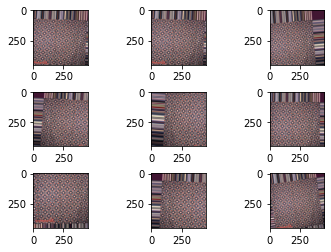

In [9]:
#plot Yogya Cap Nogosari Sogan Closing

#define location of dataset
folder = 'train/'

#plot show first 9 image
for i in range (9):
  #define subplot
  plt.subplot(330 +1 + i) #(3,3, i+1)
  plt.subplots_adjust(hspace=0.5)
  #define filename
  filename = folder + 'YCNSC.' + str(i) + '.jpg'
  #load image pixels
  image = imread(filename)
  #plot raw pixel data
  plt.imshow(image)
# show the image
plt.show()

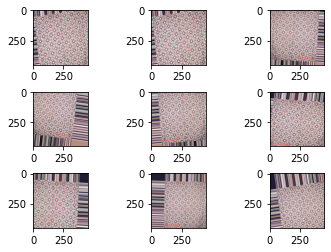

In [10]:
#plot Yogya Cap Nogosari Sogan Dilation

#define location of dataset
folder = 'train/'

#plot show first 9 image
for i in range (9):
  #define subplot
  plt.subplot(330 +1 + i) #(3,3, i+1)
  plt.subplots_adjust(hspace=0.5)
  #define filename
  filename = folder + 'YCNSD.' + str(i) + '.jpg'
  #load image pixels
  image = imread(filename)
  #plot raw pixel data
  plt.imshow(image)
# show the image
plt.show()

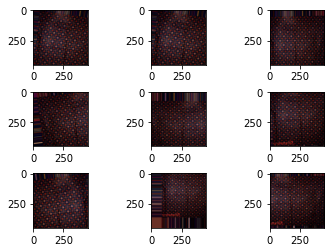

In [11]:
#plot Yogya Cap Nogosari Sogan Erosion

#define location of dataset
folder = 'train/'

#plot show first 9 image
for i in range (9):
  #define subplot
  plt.subplot(330 +1 + i) #(3,3, i+1)
  plt.subplots_adjust(hspace=0.5)
  #define filename
  filename = folder + 'YCNSE.' + str(i) + '.jpg'
  #load image pixels
  image = imread(filename)
  #plot raw pixel data
  plt.imshow(image)
# show the image
plt.show()

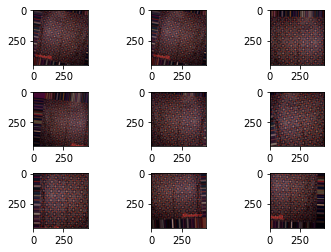

In [12]:
#plot Yogya Cap Nogosari Sogan Opening

#define location of dataset
folder = 'train/'

#plot show first 9 image
for i in range (9):
  #define subplot
  plt.subplot(330 +1 + i) #(3,3, i+1)
  plt.subplots_adjust(hspace=0.5)
  #define filename
  filename = folder + 'YCNSO.' + str(i) + '.jpg'
  #load image pixels
  image = imread(filename)
  #plot raw pixel data
  plt.imshow(image)
# show the image
plt.show()

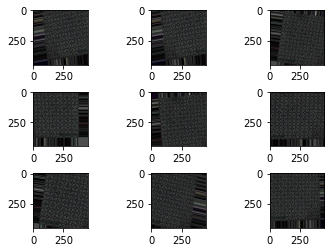

In [13]:
#plot Yogya Cap Nogosari Sogan White Tophat

#define location of dataset
folder = 'train/'

#plot show first 9 image
for i in range (9):
  #define subplot
  plt.subplot(330 +1 + i) #(3,3, i+1)
  plt.subplots_adjust(hspace=0.5)
  #define filename
  filename = folder + 'YCNSWT.' + str(i) + '.jpg'
  #load image pixels
  image = imread(filename)
  #plot raw pixel data
  plt.imshow(image)
# show the image
plt.show()

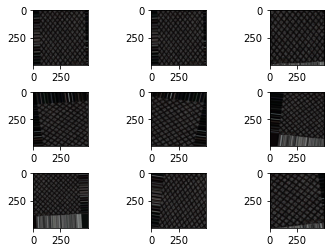

In [14]:
#plot Yogya Tulis Nogosari Sogan Black Tophat

#define location of dataset
folder = 'train/'

#plot show first 9 image
for i in range (9):
  #define subplot
  plt.subplot(330 +1 + i) #(3,3, i+1)
  plt.subplots_adjust(hspace=0.5)
  #define filename
  filename = folder + 'YTNSBT.' + str(i) + '.jpg'
  #load image pixels
  image = imread(filename)
  #plot raw pixel data
  plt.imshow(image)
# show the image
plt.show()

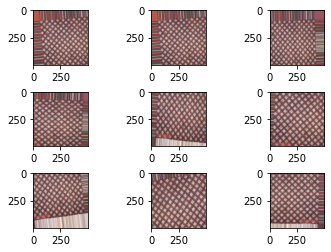

In [15]:
#plot Yogya Tulis Nogosari Sogan Closing

#define location of dataset
folder = 'train/'

#plot show first 9 image
for i in range (9):
  #define subplot
  plt.subplot(330 +1 + i) #(3,3, i+1)
  plt.subplots_adjust(hspace=0.5)
  #define filename
  filename = folder + 'YTNSC.' + str(i) + '.jpg'
  #load image pixels
  image = imread(filename)
  #plot raw pixel data
  plt.imshow(image)
# show the image
plt.show()

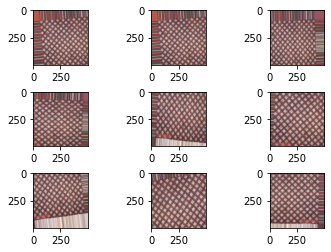

In [16]:
#plot Yogya Tulis Nogosari Sogan Closing

#define location of dataset
folder = 'train/'

#plot show first 9 image
for i in range (9):
  #define subplot
  plt.subplot(330 +1 + i) #(3,3, i+1)
  plt.subplots_adjust(hspace=0.5)
  #define filename
  filename = folder + 'YTNSC.' + str(i) + '.jpg'
  #load image pixels
  image = imread(filename)
  #plot raw pixel data
  plt.imshow(image)
# show the image
plt.show()

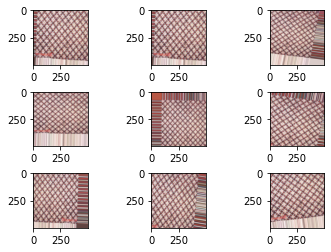

In [17]:
#plot Yogya Tulis Nogosari Sogan Dilation

#define location of dataset
folder = 'train/'

#plot show first 9 image
for i in range (9):
  #define subplot
  plt.subplot(330 +1 + i) #(3,3, i+1)
  plt.subplots_adjust(hspace=0.5)
  #define filename
  filename = folder + 'YTNSD.' + str(i) + '.jpg'
  #load image pixels
  image = imread(filename)
  #plot raw pixel data
  plt.imshow(image)
# show the image
plt.show()

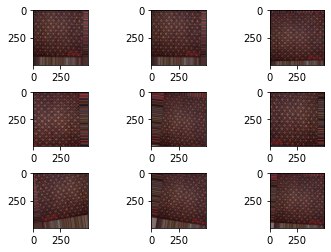

In [18]:
#plot Yogya Tulis Nogosari Sogan Erosion

#define location of dataset
folder = 'train/'

#plot show first 9 image
for i in range (9):
  #define subplot
  plt.subplot(330 +1 + i) #(3,3, i+1)
  plt.subplots_adjust(hspace=0.5)
  #define filename
  filename = folder + 'YTNSE.' + str(i) + '.jpg'
  #load image pixels
  image = imread(filename)
  #plot raw pixel data
  plt.imshow(image)
# show the image
plt.show()

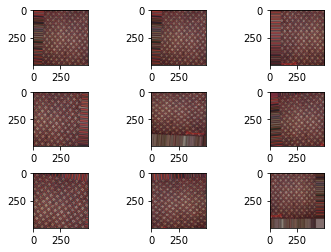

In [19]:
#plot Yogya Tulis Nogosari Sogan Opening

#define location of dataset
folder = 'train/'

#plot show first 9 image
for i in range (9):
  #define subplot
  plt.subplot(330 +1 + i) #(3,3, i+1)
  plt.subplots_adjust(hspace=0.5)
  #define filename
  filename = folder + 'YTNSO.' + str(i) + '.jpg'
  #load image pixels
  image = imread(filename)
  #plot raw pixel data
  plt.imshow(image)
# show the image
plt.show()

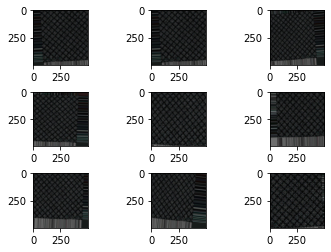

In [20]:
#plot Yogya Tulis Nogosari Sogan White Tophatt

#define location of dataset
folder = 'train/'

#plot show first 9 image
for i in range (9):
  #define subplot
  plt.subplot(330 +1 + i) #(3,3, i+1)
  plt.subplots_adjust(hspace=0.5)
  #define filename
  filename = folder + 'YTNSWT.' + str(i) + '.jpg'
  #load image pixels
  image = imread(filename)
  #plot raw pixel data
  plt.imshow(image)
# show the image
plt.show()

#4. Organize new Dataset Place

In [ ]:
# on this stage, u'll organize new dataset place on ur drive directory
# we'll gonna make new one as dataset_home and sub dir where the train_dir and test_dir
# the structure new dataset place is like this:
#     Dataset_home
#          -> Sub dir (train)
#                -> sub dir (cap)
#                -> sub dir (tulis)
#          -> Sub dir (test)
#                -> sub dir (cap)
#                -> sub dir (tulis)

In [ ]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = 'dataset_Cap_vs_Tulis/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['cap/', 'tulis/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
# seed random number generator
seed(seedNum)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('YT'):
		dst = dataset_home + dst_dir + 'tulis/'  + file
		copyfile(src, dst)
	elif file.startswith('YC'):
		dst = dataset_home + dst_dir + 'cap/'  + file
		copyfile(src, dst)

#5. Define CNN models

In [ ]:
#for testing, we're gonna use 7 model
#which is every models have a different result each other

In [30]:
# define cnn model with One Block VGG Model
def define_model1():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(optimizer=default_opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# define cnn model - Two Block VGG Model
def define_model2():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(optimizer=default_opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# define cnn model 3 - Three Blok VGG Model
def define_model3():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(optimizer=default_opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

#define cnn model 4 - VGG-3 and Dropout ver.1
def define_model4():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(optimizer=default_opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# define cnn model 5 - VGG-3 and Dropout ver.2
def define_model5():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(optimizer=default_opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# define cnn model 6 - VGG-3 and image data augmentation
def define_model6():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(optimizer=default_opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# define cnn model 7 - VGG-3, dropout, and image data augmentation
def define_model7():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(optimizer=default_opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

#6. Evaluate each Models

Found 425 images belonging to 2 classes.
Found 133 images belonging to 2 classes.
Epoch 1/5
7/7 [==============================] - 14s 2s/step - loss: 28.5030 - accuracy: 0.5271 - val_loss: 17.4009 - val_accuracy: 0.5865
Epoch 2/5
7/7 [==============================] - 14s 2s/step - loss: 13.4733 - accuracy: 0.5035 - val_loss: 2.3841 - val_accuracy: 0.7744
Epoch 3/5
7/7 [==============================] - 13s 2s/step - loss: 3.3953 - accuracy: 0.6353 - val_loss: 2.2380 - val_accuracy: 0.7068
Epoch 4/5
7/7 [==============================] - 13s 2s/step - loss: 0.8695 - accuracy: 0.7882 - val_loss: 0.8637 - val_accuracy: 0.6466
Epoch 5/5
7/7 [==============================] - 13s 2s/step - loss: 0.3736 - accuracy: 0.8447 - val_loss: 0.2576 - val_accuracy: 0.8797
> 87.970


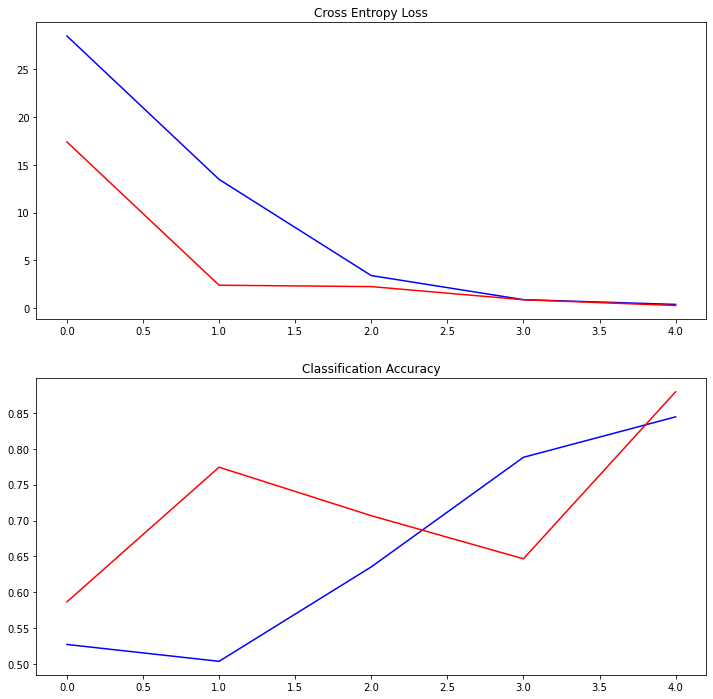

Total time for the model processing: 0:01:22.483975


In [34]:
#set StarTimeModule for Model with One Block VGG
startTimeModule = datetime.now()
tf.random.set_seed(seedNum)

# run the test for evaluating a model
def run_test():
	# define model
	model1 = define_model1()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory('dataset_Cap_vs_Tulis/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('dataset_Cap_vs_Tulis/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model1.fit(train_it, 
                      steps_per_epoch=len(train_it),
                      validation_data=test_it, 
                      validation_steps=len(test_it), 
                      epochs=5, 
                      verbose=1
                      )
	# evaluate model
  # multiply sequence by non-int of type 'float'
	_, acc = model1.evaluate(test_it, steps=len(test_it), verbose=0) 
	print('> %.3f' % (acc * 100.0))
	# learning curves
	grafik(history)
 
# entry point, run the test
run_test()
print('Total time for the model processing:', (datetime.now() - startTimeModule))

Found 425 images belonging to 2 classes.
Found 133 images belonging to 2 classes.
Epoch 1/5
7/7 [==============================] - 23s 3s/step - loss: 20.1936 - accuracy: 0.5624 - val_loss: 4.9677 - val_accuracy: 0.4286
Epoch 2/5
7/7 [==============================] - 26s 4s/step - loss: 2.1405 - accuracy: 0.5200 - val_loss: 0.6170 - val_accuracy: 0.5865
Epoch 3/5
7/7 [==============================] - 24s 3s/step - loss: 0.5913 - accuracy: 0.7035 - val_loss: 0.6036 - val_accuracy: 0.7218
Epoch 4/5
7/7 [==============================] - 23s 3s/step - loss: 0.5287 - accuracy: 0.8447 - val_loss: 0.5447 - val_accuracy: 0.6842
Epoch 5/5
7/7 [==============================] - 23s 3s/step - loss: 0.3931 - accuracy: 0.8682 - val_loss: 0.4537 - val_accuracy: 0.7970
> 79.699


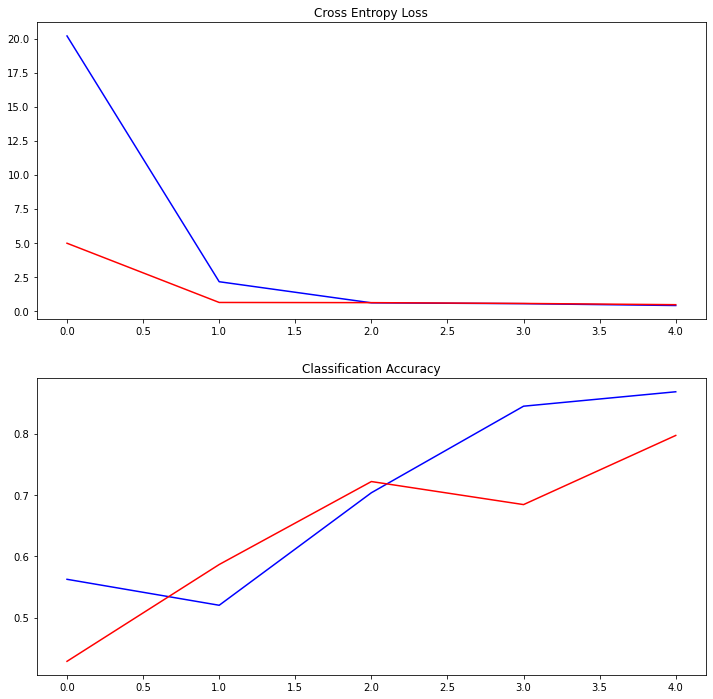

Total time for the model processing: 0:02:22.773549


In [36]:
#set StarTimeModule for Model with Two Block VGG
startTimeModule = datetime.now()
tf.random.set_seed(seedNum)

# run the test for evaluating a model
def run_test():
	# define model
	model2 = define_model2()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory('dataset_Cap_vs_Tulis/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('dataset_Cap_vs_Tulis/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model2.fit(train_it, 
                      steps_per_epoch=len(train_it),
                      validation_data=test_it, 
                      validation_steps=len(test_it), 
                      epochs=5, 
                      verbose=1
                      )
	# evaluate model
  # multiply sequence by non-int of type 'float'
	_, acc = model2.evaluate(test_it, steps=len(test_it), verbose=0) 
	print('> %.3f' % (acc * 100.0))
	# learning curves
	grafik(history)
 
# entry point, run the test
run_test()
print('Total time for the model processing:', (datetime.now() - startTimeModule))

Found 425 images belonging to 2 classes.
Found 133 images belonging to 2 classes.
Epoch 1/5
7/7 [==============================] - 32s 5s/step - loss: 6.0933 - accuracy: 0.5671 - val_loss: 0.7237 - val_accuracy: 0.4511
Epoch 2/5
7/7 [==============================] - 31s 4s/step - loss: 0.6673 - accuracy: 0.5929 - val_loss: 0.6142 - val_accuracy: 0.6090
Epoch 3/5
7/7 [==============================] - 31s 4s/step - loss: 0.5956 - accuracy: 0.6612 - val_loss: 0.4806 - val_accuracy: 0.7669
Epoch 4/5
7/7 [==============================] - 31s 4s/step - loss: 0.5699 - accuracy: 0.7671 - val_loss: 0.4387 - val_accuracy: 0.8120
Epoch 5/5
7/7 [==============================] - 31s 4s/step - loss: 0.5141 - accuracy: 0.7765 - val_loss: 0.4715 - val_accuracy: 0.7293
> 72.932


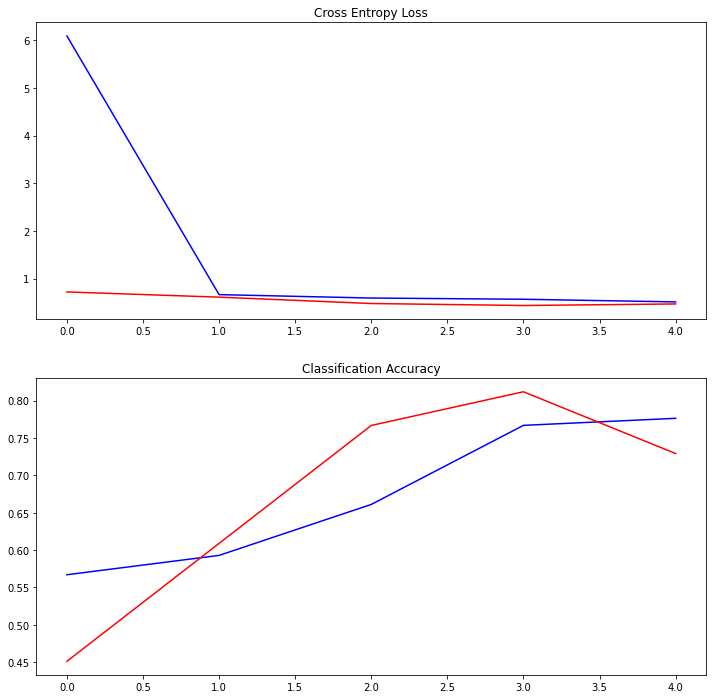

Total time for the model processing: 0:03:08.575151


In [37]:
#set StarTimeModule for Model with Three Block VGG
startTimeModule = datetime.now()
tf.random.set_seed(seedNum)

# run the test for evaluating a model
def run_test():
	# define model
	model3 = define_model3()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory('dataset_Cap_vs_Tulis/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('dataset_Cap_vs_Tulis/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model3.fit(train_it, 
                      steps_per_epoch=len(train_it),
                      validation_data=test_it, 
                      validation_steps=len(test_it), 
                      epochs=5, 
                      verbose=1
                      )
	# evaluate model
  # multiply sequence by non-int of type 'float'
	_, acc = model3.evaluate(test_it, steps=len(test_it), verbose=0) 
	print('> %.3f' % (acc * 100.0))
	# learning curves
	grafik(history)
 
# entry point, run the test
run_test()
print('Total time for the model processing:', (datetime.now() - startTimeModule))

Found 425 images belonging to 2 classes.
Found 133 images belonging to 2 classes.
Epoch 1/5
7/7 [==============================] - 35s 5s/step - loss: 13.6988 - accuracy: 0.5082 - val_loss: 0.6955 - val_accuracy: 0.5188
Epoch 2/5
7/7 [==============================] - 33s 5s/step - loss: 0.7181 - accuracy: 0.4894 - val_loss: 0.6930 - val_accuracy: 0.4135
Epoch 3/5
7/7 [==============================] - 33s 5s/step - loss: 0.6921 - accuracy: 0.5529 - val_loss: 0.6879 - val_accuracy: 0.7293
Epoch 4/5
7/7 [==============================] - 33s 5s/step - loss: 0.6921 - accuracy: 0.5765 - val_loss: 0.6947 - val_accuracy: 0.4211
Epoch 5/5
7/7 [==============================] - 36s 5s/step - loss: 0.6914 - accuracy: 0.5176 - val_loss: 0.6953 - val_accuracy: 0.4135
> 41.353


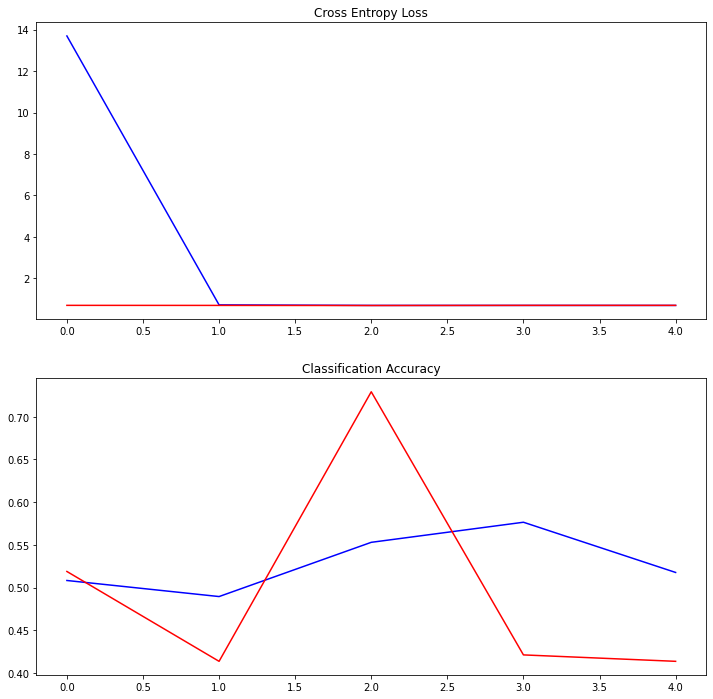

Total time for the model processing: 0:03:22.588919


In [38]:
#set StarTimeModule for Model with VGG-3 and Dropout ver.1
startTimeModule = datetime.now()
tf.random.set_seed(seedNum)

# run the test for evaluating a model
def run_test():
	# define model
	model4 = define_model4()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory('dataset_Cap_vs_Tulis/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('dataset_Cap_vs_Tulis/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model4.fit(train_it, 
                      steps_per_epoch=len(train_it),
                      validation_data=test_it, 
                      validation_steps=len(test_it), 
                      epochs=5, 
                      verbose=1
                      )
	# evaluate model
  # multiply sequence by non-int of type 'float'
	_, acc = model4.evaluate(test_it, steps=len(test_it), verbose=0) 
	print('> %.3f' % (acc * 100.0))
	# learning curves
	grafik(history)
 
# entry point, run the test
run_test()
print('Total time for the model processing:', (datetime.now() - startTimeModule))

Found 425 images belonging to 2 classes.
Found 133 images belonging to 2 classes.
Epoch 1/5
7/7 [==============================] - 34s 5s/step - loss: 20.1730 - accuracy: 0.5129 - val_loss: 0.7238 - val_accuracy: 0.4135
Epoch 2/5
7/7 [==============================] - 33s 5s/step - loss: 0.7146 - accuracy: 0.4988 - val_loss: 0.6942 - val_accuracy: 0.4135
Epoch 3/5
7/7 [==============================] - 33s 5s/step - loss: 0.6922 - accuracy: 0.5082 - val_loss: 0.6830 - val_accuracy: 0.5865
Epoch 4/5
7/7 [==============================] - 35s 5s/step - loss: 0.6922 - accuracy: 0.5106 - val_loss: 0.6878 - val_accuracy: 0.6692
Epoch 5/5
7/7 [==============================] - 33s 5s/step - loss: 0.6841 - accuracy: 0.5365 - val_loss: 0.6789 - val_accuracy: 0.6165
> 61.654


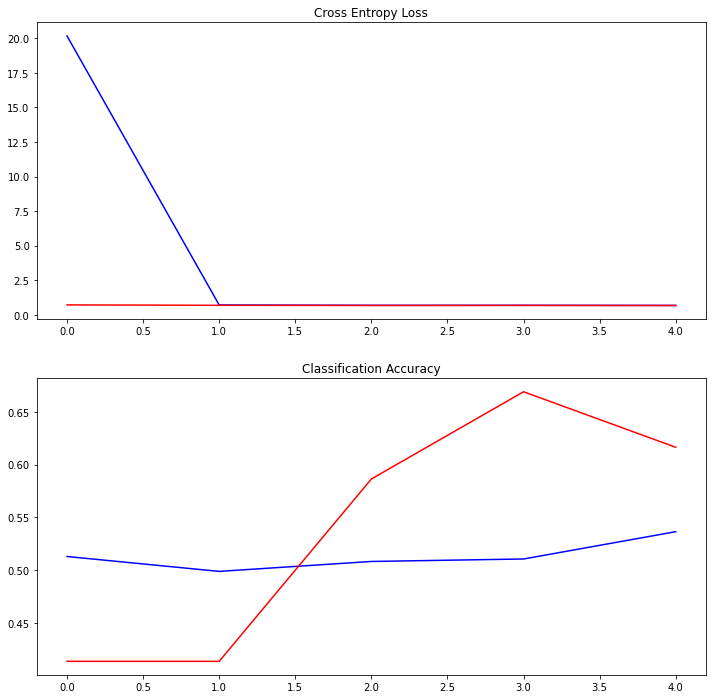

Total time for the model processing: 0:03:20.438202


In [39]:
#set StarTimeModule for Model with VGG 3 with Dropout ver 2
startTimeModule = datetime.now()
tf.random.set_seed(seedNum)

# run the test for evaluating a model
def run_test():
	# define model
	model5 = define_model5()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory('dataset_Cap_vs_Tulis/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('dataset_Cap_vs_Tulis/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model5.fit(train_it, 
                      steps_per_epoch=len(train_it),
                      validation_data=test_it, 
                      validation_steps=len(test_it), 
                      epochs=5, 
                      verbose=1
                      )
	# evaluate model
  # multiply sequence by non-int of type 'float'
	_, acc = model5.evaluate(test_it, steps=len(test_it), verbose=0) 
	print('> %.3f' % (acc * 100.0))
	# learning curves
	grafik(history)
 
# entry point, run the test
run_test()
print('Total time for the model processing:', (datetime.now() - startTimeModule))

Found 425 images belonging to 2 classes.
Found 133 images belonging to 2 classes.
Epoch 1/5
7/7 [==============================] - 32s 5s/step - loss: 9.7286 - accuracy: 0.5012 - val_loss: 0.7392 - val_accuracy: 0.4135
Epoch 2/5
7/7 [==============================] - 31s 4s/step - loss: 0.7699 - accuracy: 0.5082 - val_loss: 0.7628 - val_accuracy: 0.4511
Epoch 3/5
7/7 [==============================] - 31s 4s/step - loss: 0.7422 - accuracy: 0.5082 - val_loss: 0.7263 - val_accuracy: 0.4511
Epoch 4/5
7/7 [==============================] - 31s 4s/step - loss: 0.6954 - accuracy: 0.5176 - val_loss: 0.6694 - val_accuracy: 0.5865
Epoch 5/5
7/7 [==============================] - 31s 4s/step - loss: 0.6767 - accuracy: 0.6329 - val_loss: 0.6712 - val_accuracy: 0.6692
> 66.917


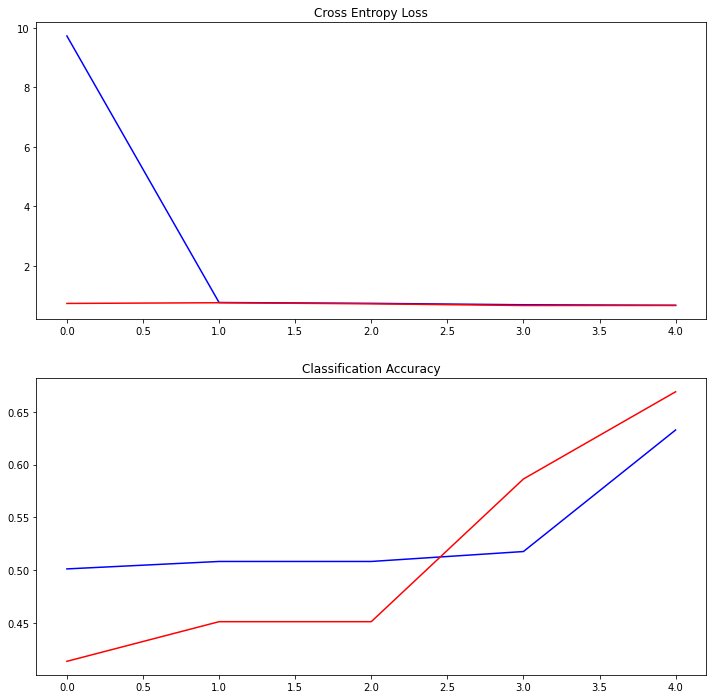

Total time for the model processing: 0:03:07.722269


In [40]:
#set StarTimeModule for Model with VGG 3 and Image Data Augmentation
startTimeModule = datetime.now()
tf.random.set_seed(seedNum)

# run the test for evaluating a model
def run_test():
	# define model
	model6 = define_model6()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory('dataset_Cap_vs_Tulis/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('dataset_Cap_vs_Tulis/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model6.fit(train_it, 
                      steps_per_epoch=len(train_it),
                      validation_data=test_it, 
                      validation_steps=len(test_it), 
                      epochs=5, 
                      verbose=1
                      )
	# evaluate model
  # multiply sequence by non-int of type 'float'
	_, acc = model6.evaluate(test_it, steps=len(test_it), verbose=0) 
	print('> %.3f' % (acc * 100.0))
	# learning curves
	grafik(history)
 
# entry point, run the test
run_test()
print('Total time for the model processing:', (datetime.now() - startTimeModule))

Found 425 images belonging to 2 classes.
Found 133 images belonging to 2 classes.
Epoch 1/5
7/7 [==============================] - 35s 5s/step - loss: 33.9963 - accuracy: 0.5106 - val_loss: 0.7208 - val_accuracy: 0.4135
Epoch 2/5
7/7 [==============================] - 33s 5s/step - loss: 0.7024 - accuracy: 0.5482 - val_loss: 0.6940 - val_accuracy: 0.4135
Epoch 3/5
7/7 [==============================] - 33s 5s/step - loss: 0.6951 - accuracy: 0.4918 - val_loss: 0.6946 - val_accuracy: 0.4135
Epoch 4/5
7/7 [==============================] - 35s 5s/step - loss: 0.6931 - accuracy: 0.4918 - val_loss: 0.6945 - val_accuracy: 0.4135
Epoch 5/5
7/7 [==============================] - 33s 5s/step - loss: 0.6922 - accuracy: 0.4894 - val_loss: 0.6936 - val_accuracy: 0.4135
> 41.353


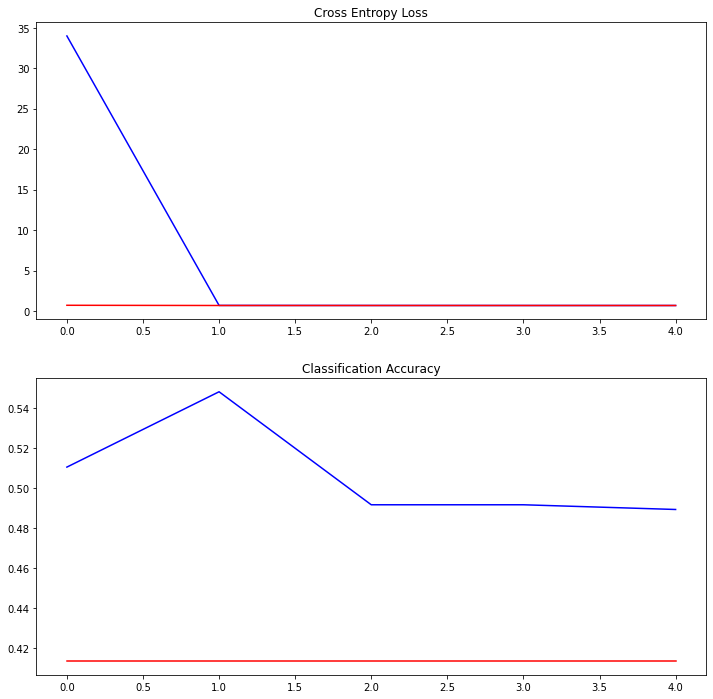

Total time for the model processing: 0:03:20.177221


In [42]:
#set StarTimeModule for Model with VGG-3, Dropout and Image data augmentation
startTimeModule = datetime.now()
tf.random.set_seed(seedNum)

# run the test for evaluating a model
def run_test():
	# define model
	model7 = define_model7()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory('dataset_Cap_vs_Tulis/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('dataset_Cap_vs_Tulis/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model7.fit(train_it, 
                      steps_per_epoch=len(train_it),
                      validation_data=test_it, 
                      validation_steps=len(test_it), 
                      epochs=5, 
                      verbose=1
                      )
	# evaluate model
  # multiply sequence by non-int of type 'float'
	_, acc = model7.evaluate(test_it, steps=len(test_it), verbose=0) 
	print('> %.3f' % (acc * 100.0))
	# learning curves
	grafik(history)
 
# entry point, run the test
run_test()
print('Total time for the model processing:', (datetime.now() - startTimeModule))